# Advanced Regression - House Price Prediction Assigment

## Problem Statement
A US-based housing company named Surprise Housing has collected a data set 'train.csv' from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. We need to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know: 
<ul><li>Which variables are significant in predicting the price of a house</li>
<li>How well those variables describe the price of a house</li></ul></br>
Also, we need to determine the optimal value of lambda for ridge and lasso regression.

## Approach
The solution is developed in the following steps: 
- Step 1: Data Understanding
- Step 2: Data Cleaning
- Step 3: Exploratory Data Analysis (EDA)
- Step 4: Data Preparation
- Step 5: Model Building and Evaluation
- Step 6: Conclusion

## Step 1: Data Understanding

In [151]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [152]:
# Load the data and check how it looks like
df_house = pd.read_csv('train.csv')
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [153]:
# Check the number of rows and columns
df_house.shape

(1460, 81)

In [154]:
# Check on the numerical variables
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [155]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step 2: Data Cleaning

#### Check missing values

In [156]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [157]:
df_house.isnull().mean().sort_values(ascending=False).head(10)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
dtype: float64

#### Imputing null values
The null in the below categorical columns means absence of the facility. Hence, let us impute null with 'None'

In [158]:
cols_with_meaningful_nulls = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in cols_with_meaningful_nulls:
    df_house[i].fillna("none", inplace=True)

In [159]:
# Let's check null once again
df_house.isnull().mean().sort_values(ascending=False).head(10)

LotFrontage     0.177397
GarageYrBlt     0.055479
MasVnrArea      0.005479
Electrical      0.000685
KitchenAbvGr    0.000000
GarageType      0.000000
FireplaceQu     0.000000
Fireplaces      0.000000
Functional      0.000000
TotRmsAbvGrd    0.000000
dtype: float64

Handling null for the remaining variables (from above output) with null values

In [160]:
df_house["GarageYrBlt"].fillna(df_house["GarageYrBlt"].median(), inplace=True)
df_house["MasVnrArea"].fillna(df_house["MasVnrArea"].median(), inplace=True)
df_house["Electrical"].dropna(inplace=True)

# Based on understading from data dictionary, for lotfrontage, we can impute it with the median of similar neighborhood values.
df_house['LotFrontage'] = df_house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


#### Check variables which have same values for all rows

In [161]:
df_house.nunique().sort_values().head(10)

CentralAir      2
Street          2
Utilities       2
HalfBath        3
PavedDrive      3
Alley           3
BsmtHalfBath    3
LandSlope       3
PoolQC          4
BsmtFullBath    4
dtype: int64

<b>Observation</b>: There are no variables with same values for all rows

#### Check if there are any duplicate rows

In [162]:
df_house.duplicated().mean()

0.0

<b>Observation</b>: There are no duplicate rows

## Step 3: Exploratory Data Analysis (EDA)

#### Target variable vs few select categorical variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

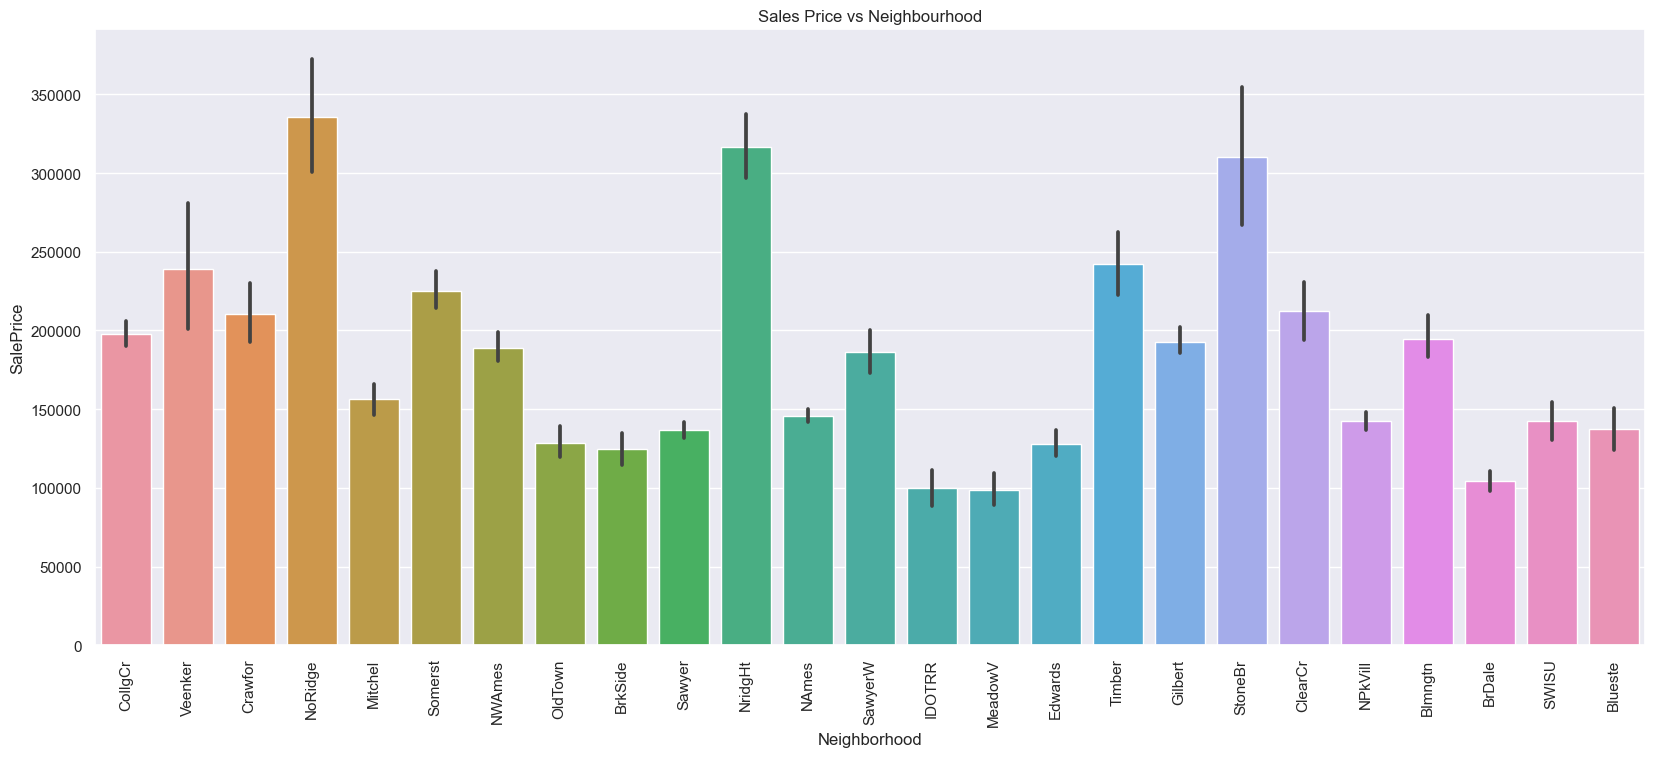

In [163]:
# 'Sale Price' vs 'Neighborhood'
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df_house)
plt.title("Sales Price vs Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

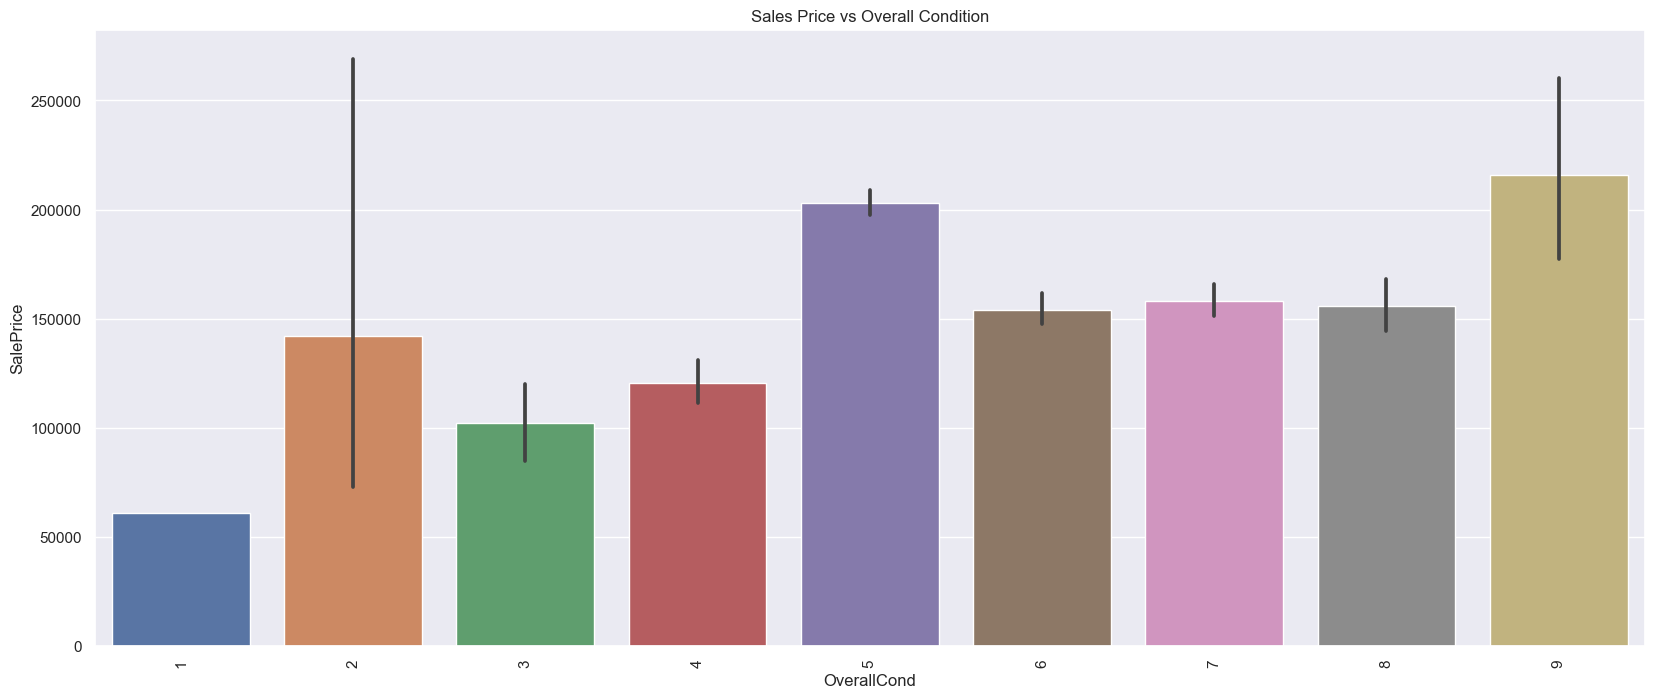

In [164]:
# 'Saleprice' vs 'Overall Condition'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df_house)
plt.title("Sales Price vs Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

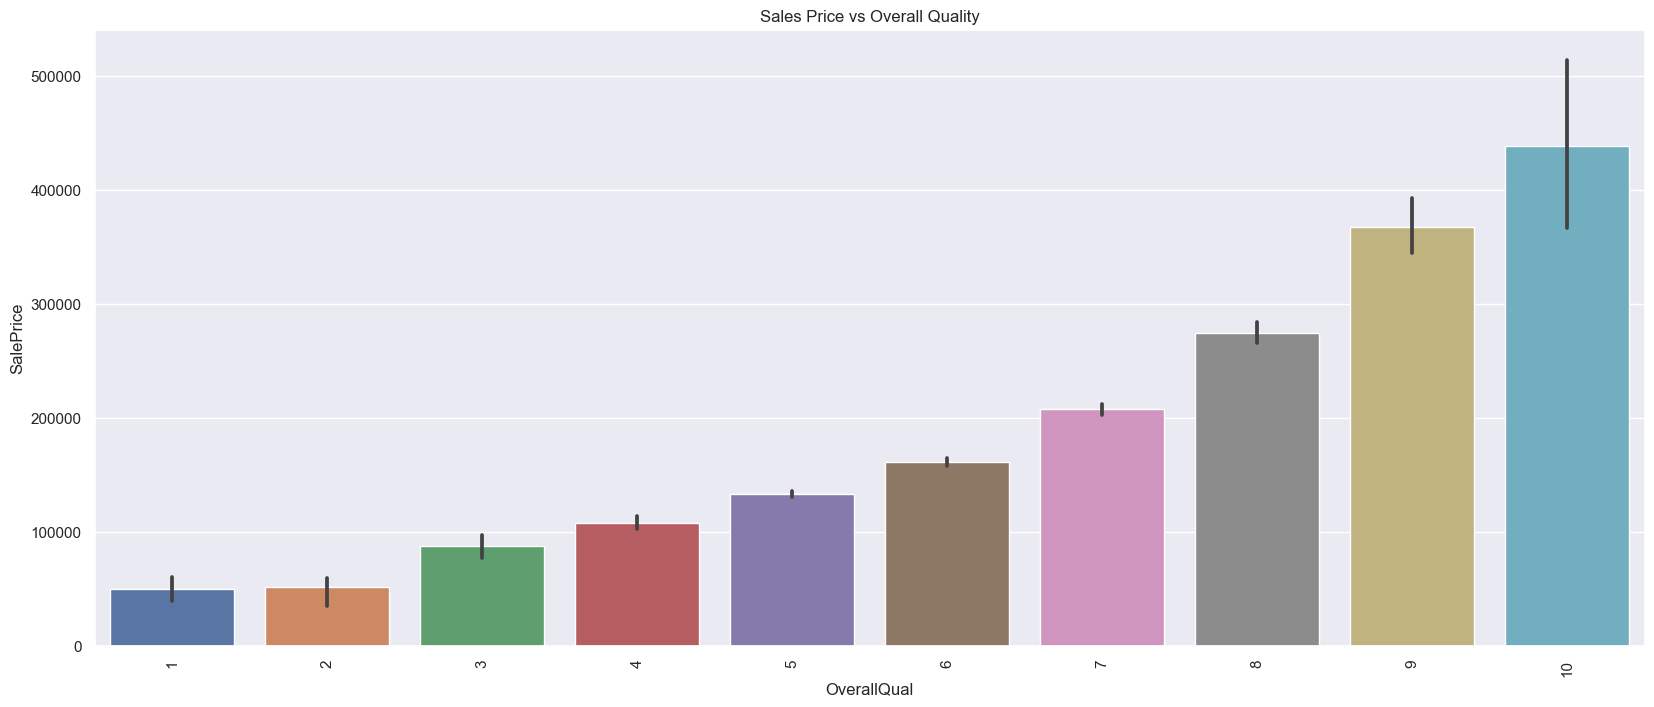

In [165]:
# 'Saleprice' vs 'Overall Quality'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df_house)
plt.title("Sales Price vs Overall Quality")
plt.xticks(rotation=90)

Overall Quality has a direct positive impact on the sale price

#### Analyzing SalePrice

<Axes: xlabel='SalePrice', ylabel='Density'>

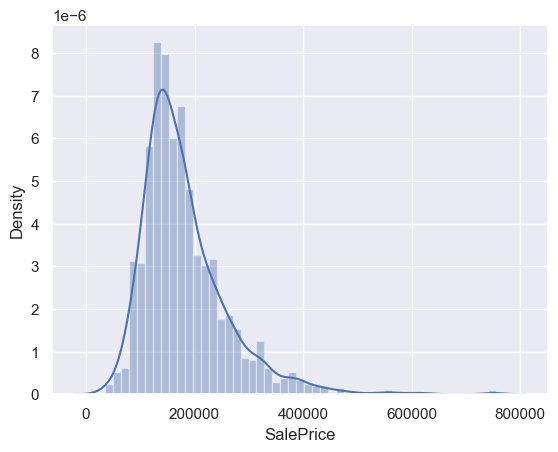

In [166]:
sns.distplot(df_house['SalePrice'])

The SalePrice appears to be skewed. For a graph like this, log transformation would help make it more normally distributed.

<Axes: xlabel='SalePrice', ylabel='Density'>

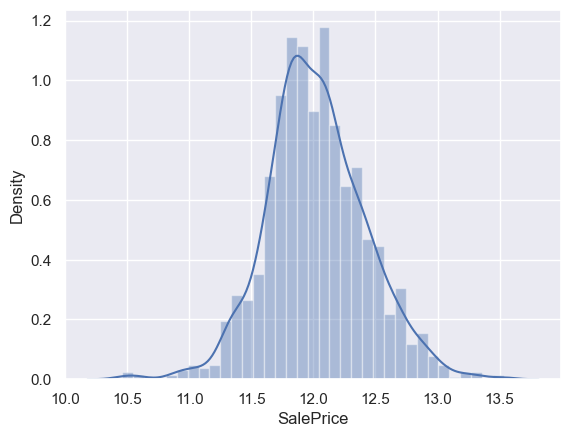

In [167]:
sns.distplot(np.log1p(df_house['SalePrice']))

We can see that the log transformation helps make the target variable more normally distributed. This will help boost the model performance. 
</br> We can apply log transformation at target variable.

In [168]:
df_house['SalePrice']=np.log1p(df_house['SalePrice'])

#### Correlation between variables
Let's understand how the numerical variables are correlated between each other

In [169]:
df_numerical = df_house.select_dtypes(include=['float64', 'int64'])
df_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220


In [170]:
# Dropping ID Column from the numerical df
df_numerical = df_numerical.drop(['Id'], axis=1)
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429220


In [171]:
# correlation matrix
corr = df_numerical.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,...,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.353288
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.426776
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


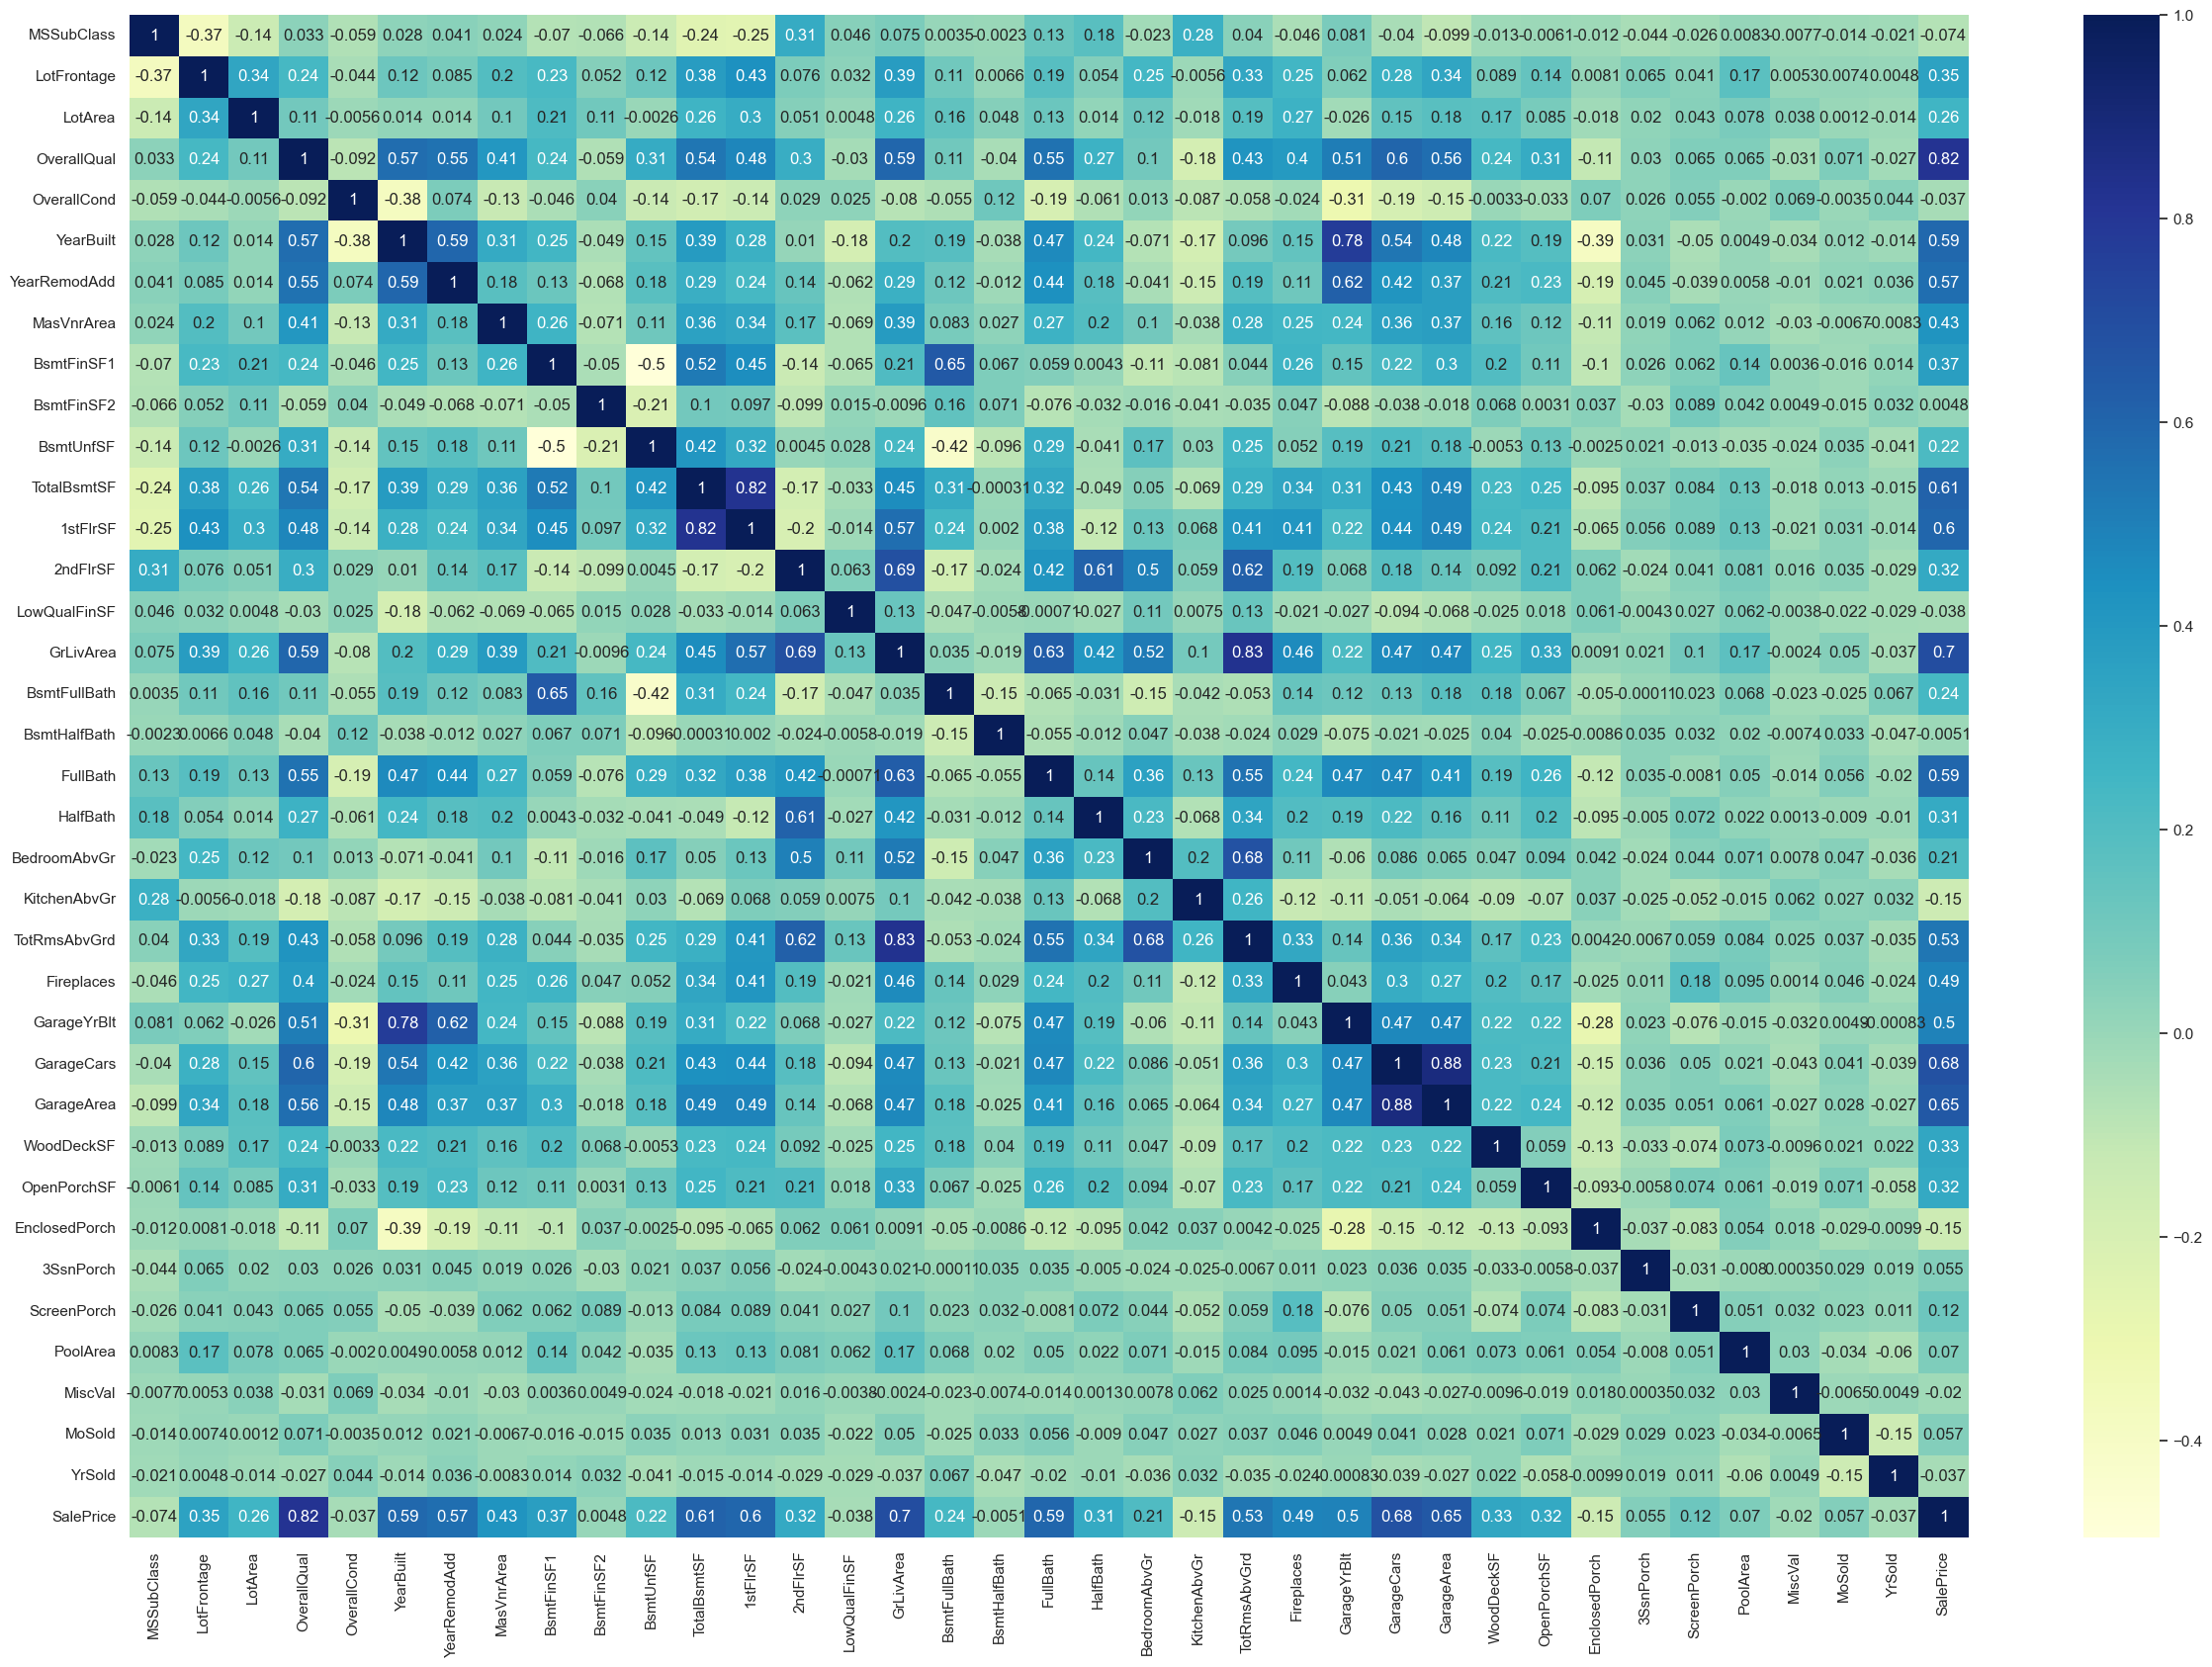

In [172]:
# Plotting correlations on a heatmap
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

#### Dropping correlated variables
We can see from above that some of the input variables are correlated between them. Let's check their predictive power on the target variable before deciding to drop them.

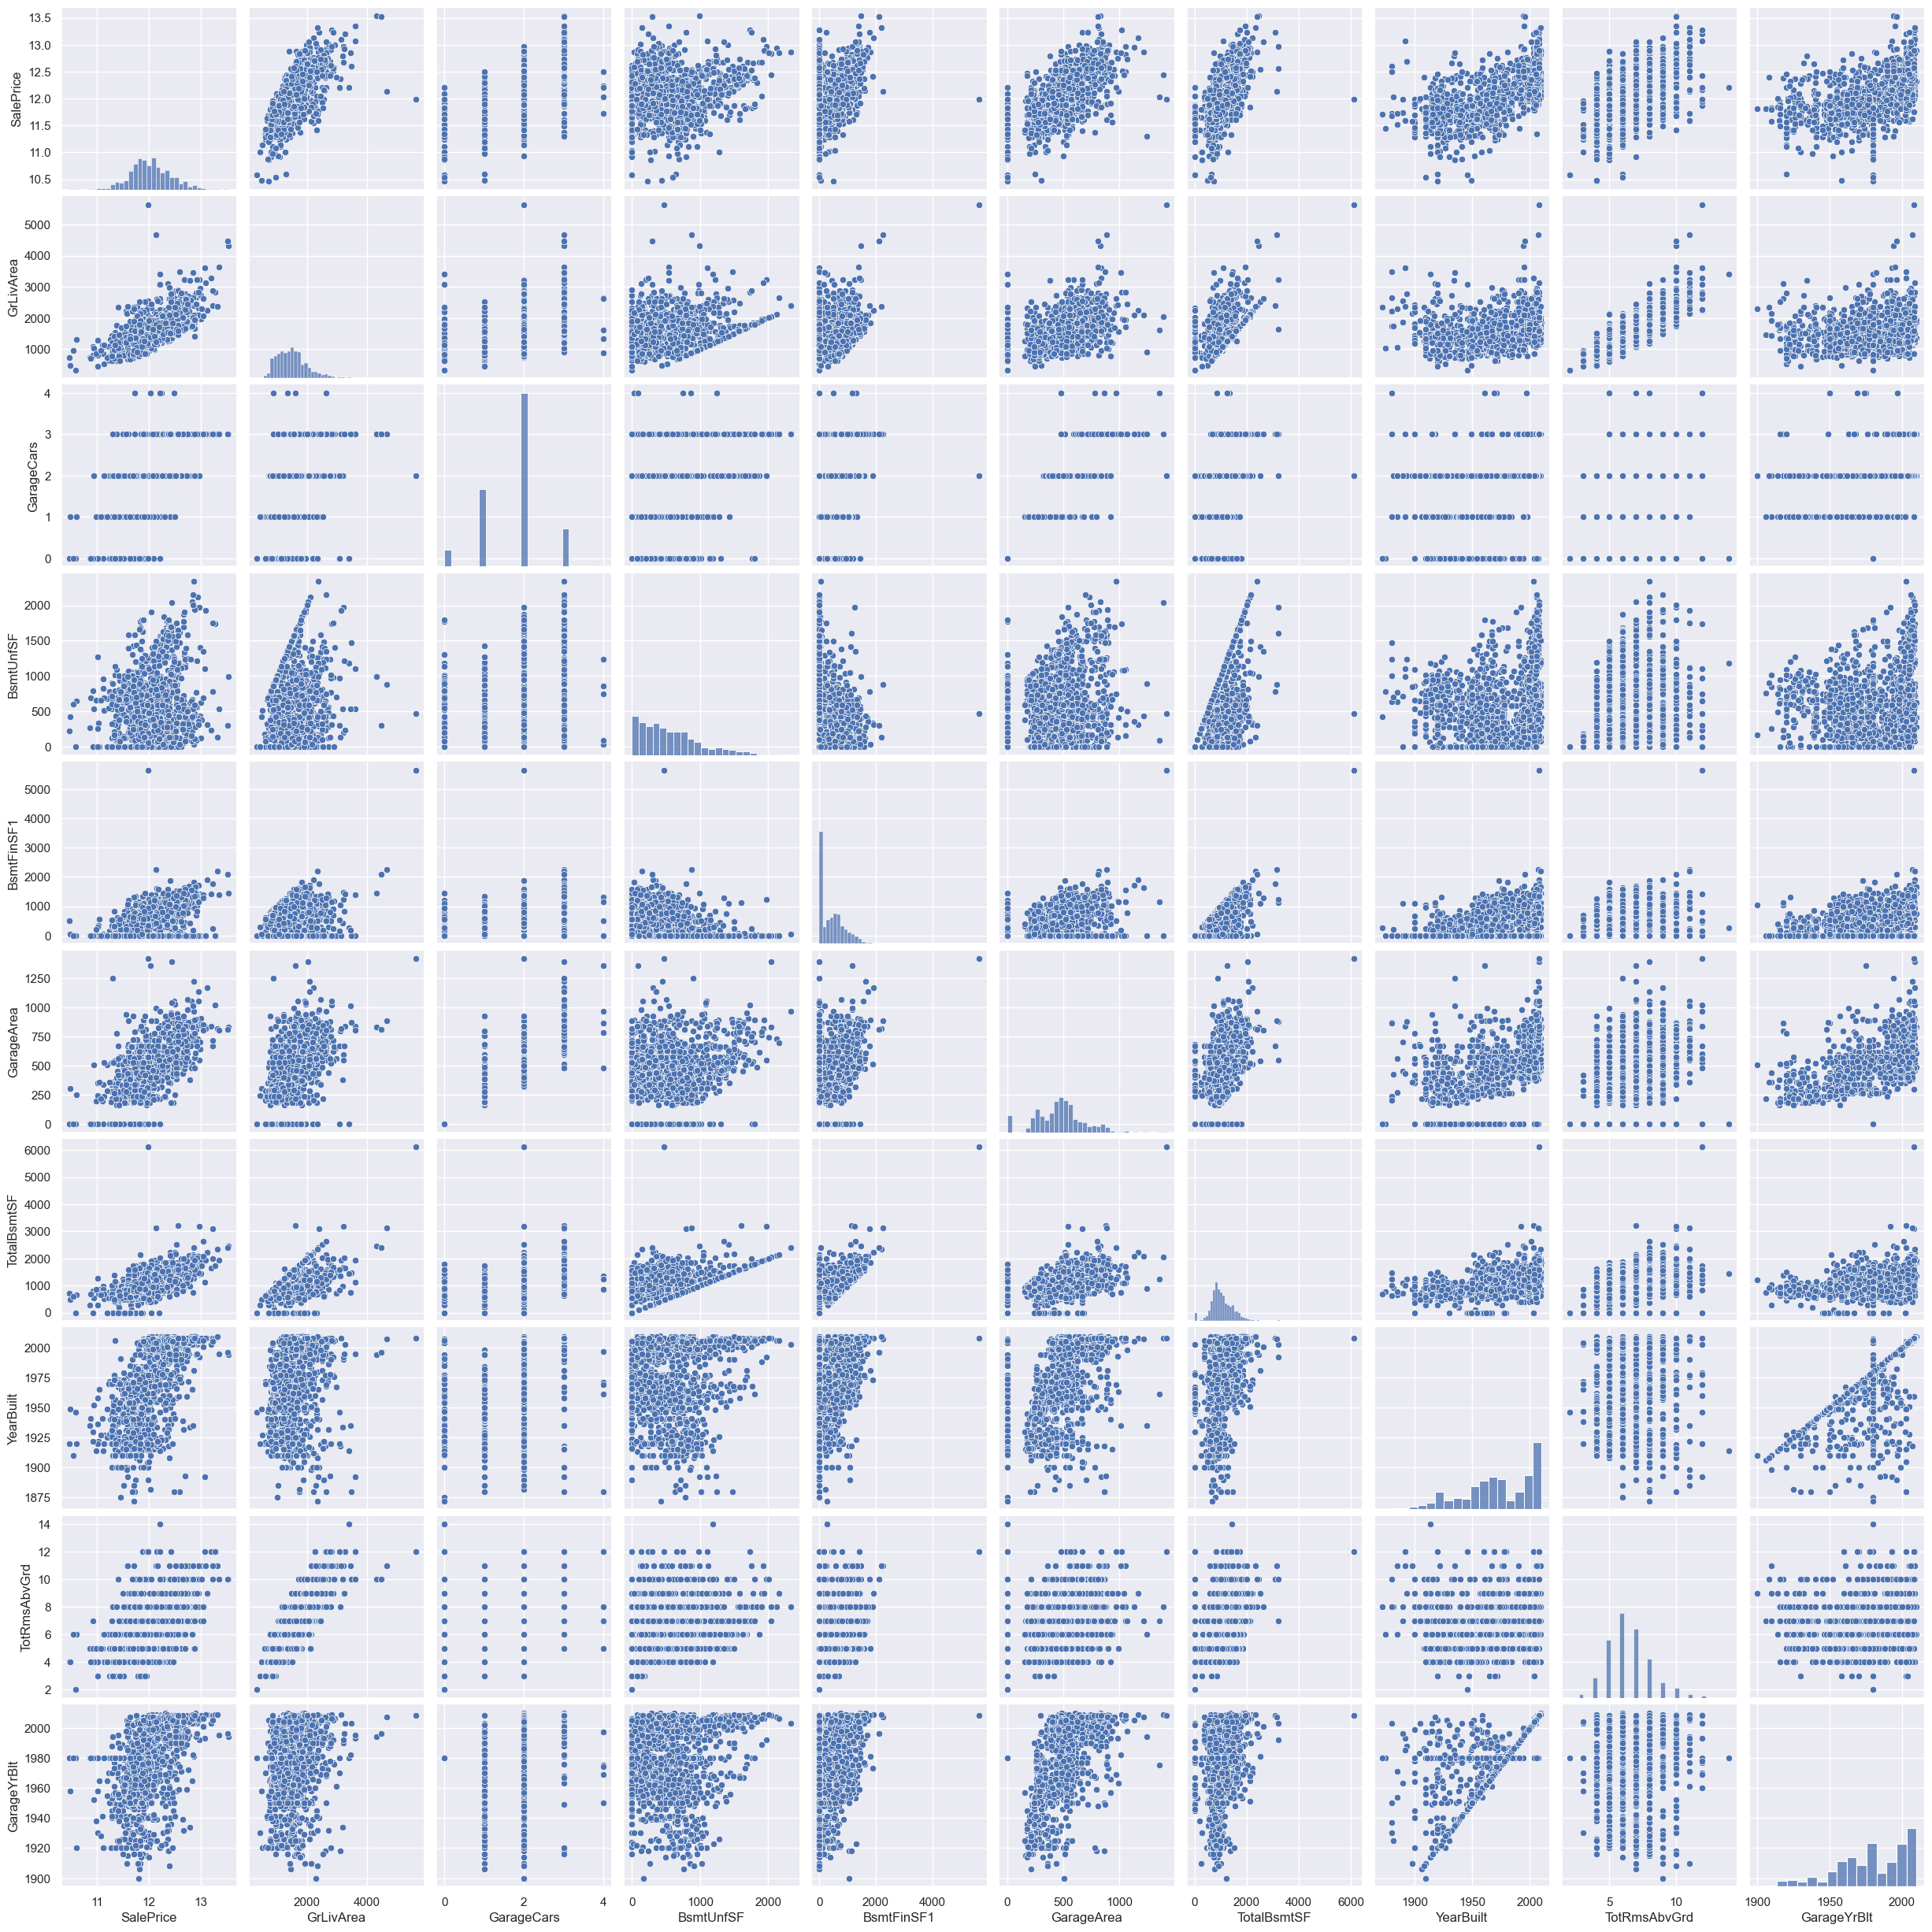

In [173]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df_house[cols], size = 2.5)
plt.show()

In [174]:
# Dropping correlated columns that do not contribute much to SalePrice
df_house = df_house.drop(['GarageCars'], axis = 1)
df_house = df_house.drop(['BsmtUnfSF'], axis = 1)
df_house = df_house.drop(['TotRmsAbvGrd'], axis = 1)
df_house = df_house.drop(['GarageYrBlt'], axis = 1)    

df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,12,2008,WD,Normal,12.429220


#### Target variable vs few select numerical variables

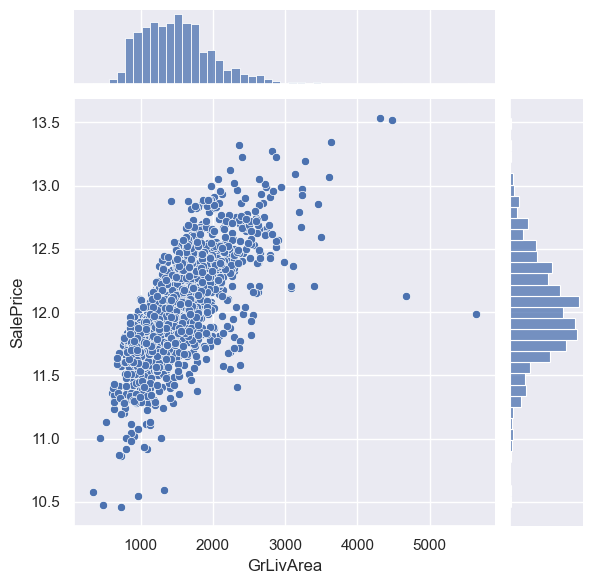

In [175]:
# Sale Price vs GrLivArea
sns.jointplot(x='GrLivArea', y='SalePrice', data=df_house)
plt.show()

NOTE: Though we see some outliers here, since the dataset is small, let's not to remove outliers

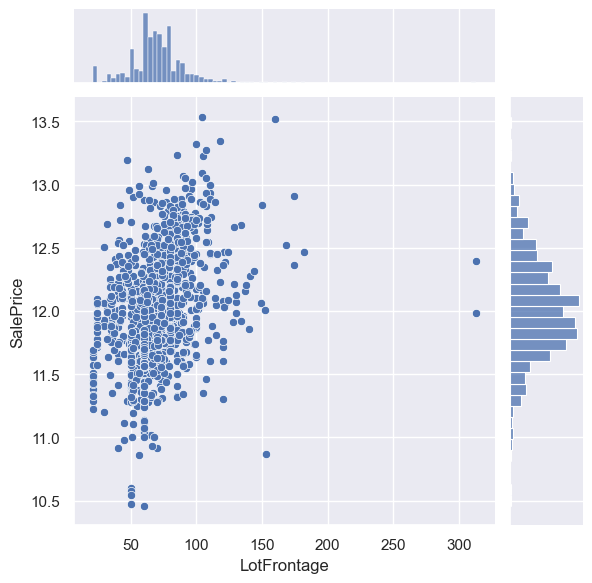

In [176]:
# SalePrice vs Lot frontage
sns.jointplot(x = df_house['LotFrontage'], y = df_house['SalePrice'])
plt.show()

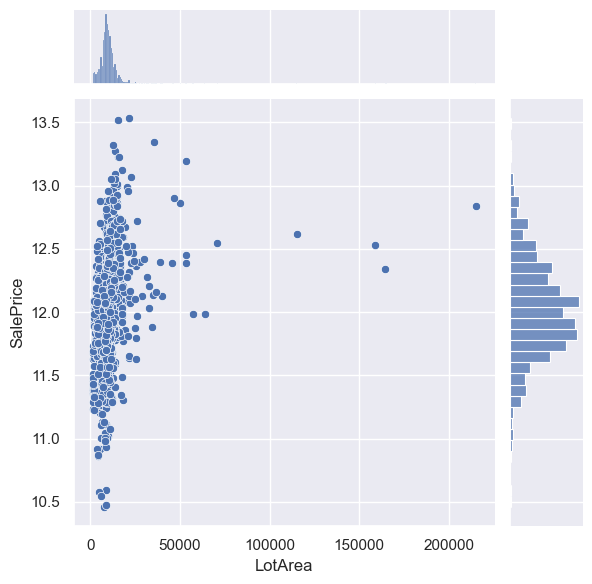

In [177]:
# SalePrice vs LotArea
sns.jointplot(x = df_house['LotArea'], y = df_house['SalePrice'])
plt.show()

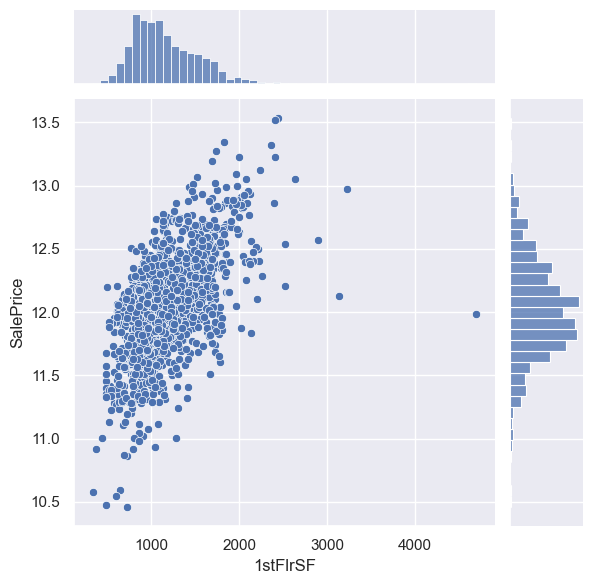

In [178]:
# SalePrice vs 1stFlrSF
sns.jointplot(x = df_house['1stFlrSF'], y = df_house['SalePrice'])
plt.show()

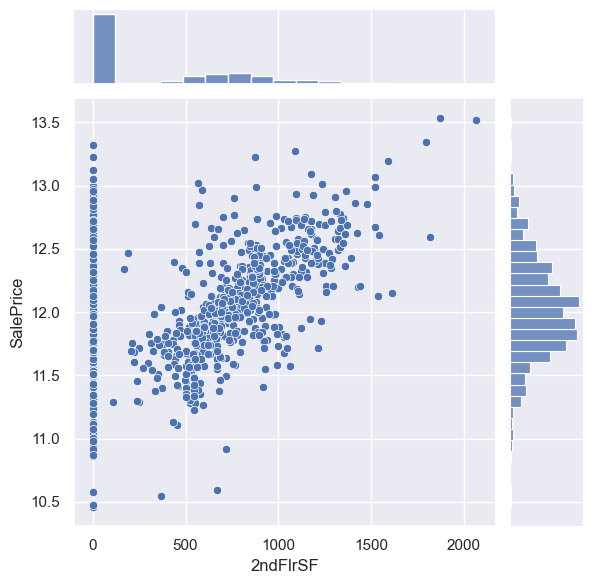

In [179]:
# SalePrice vs 2ndFlrSF
sns.jointplot(x = df_house['2ndFlrSF'], y = df_house['SalePrice'])
plt.show()

#### Derived Metrics

From the YrSold and YearBuilt variables, we can create a new variable named 'PropertyAge'

In [180]:
df_house['PropAge'] = (df_house['YrSold'] - df_house['YearBuilt'])
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,12,2008,WD,Normal,12.429220,8


In [181]:
# We can now remove these 4 columns as they will not be required anymore
df_house = df_house.drop(['MoSold'], axis = 1)
df_house = df_house.drop(['YrSold'], axis = 1)
df_house = df_house.drop(['YearBuilt'], axis = 1)
df_house = df_house.drop(['YearRemodAdd'], axis = 1)
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.429220,8


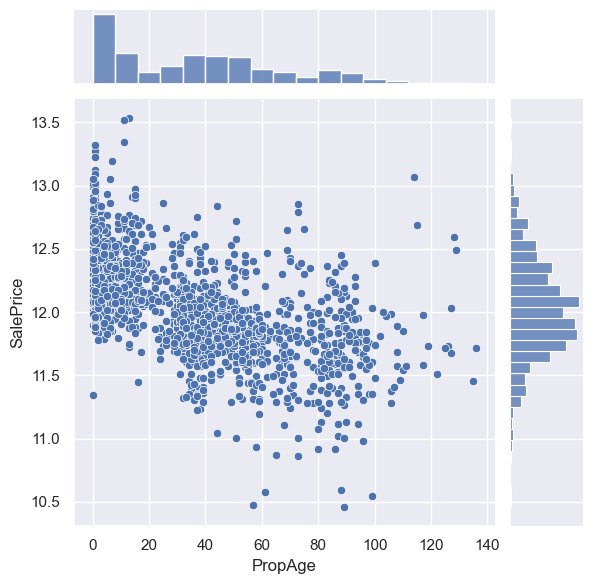

In [182]:
# SalePrice vs PropAge
sns.jointplot(x = df_house['PropAge'], y = df_house['SalePrice'])
plt.show()

We can see that as the property age increases, the price decreases.

#### Removing irrelevant variables

In [183]:
df_house.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [184]:
df_house.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

We can drop these 2 columns that show very low variance and thus not required for predictions

In [185]:
df_house = df_house.drop(['Street'], axis = 1)
df_house = df_house.drop(['Utilities'], axis = 1)

Similary we can remove other columns which show very less variance in the data

In [186]:

df_house = df_house.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [187]:
# Let's drop the 'Id' as well
df_house = df_house.drop(['Id'], axis=1)
df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,none,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,none,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,none,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,none,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,none,WD,Normal,12.429220,8


## Step 4: Data Preparation

#### Create dummies for categorical variables

In [188]:
df_house = pd.get_dummies(df_house, drop_first=True )
df_house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


#### Create X and y variables

In [189]:
X = df_house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [190]:
y = df_house['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Splitting to test and train data

In [191]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])
#X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])
cols_toscale = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']
X_train[cols_toscale] = scaler.fit_transform(X_train[cols_toscale])
X_test[cols_toscale] = scaler.fit_transform(X_test[cols_toscale])


In [193]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,-0.870387,0.612765,0.166080,-0.059996,1.252715,-0.575015,0.085426,-0.283127,0.347365,2.572160,...,0,0,0,0,1,0,0,0,1,0
1408,0.304785,-0.432534,-0.261043,-1.501313,1.252715,-0.575015,-0.943351,-0.283127,-0.973680,-1.069794,...,0,0,0,0,1,0,0,0,1,0
1148,-0.165284,-0.432534,-0.439778,0.660663,1.252715,-0.575015,-0.943351,-0.283127,-1.087563,-1.504156,...,0,0,0,0,1,0,0,0,1,0
861,3.125199,0.220778,0.079341,-0.780655,-1.406374,-0.575015,0.870488,-0.283127,-0.023894,-0.303879,...,0,0,0,0,1,0,0,0,1,0
220,-0.870387,0.133670,-0.151525,0.660663,-0.520011,-0.575015,-0.943351,-0.283127,1.021554,0.875837,...,0,0,1,0,0,0,0,0,0,1


In [194]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,-0.879672,0.106932,-0.211538,1.358461,-0.509551,-0.560080,-1.009468,-0.301886,0.899165,0.771223,...,0,0,0,0,1,0,0,0,1,0
530,0.559791,0.676372,0.029981,-0.099887,-0.509551,0.597117,0.743814,-0.301886,0.887692,0.884656,...,0,0,0,0,1,0,0,0,0,0
1291,2.479076,-2.360638,-1.583933,-0.829061,1.350309,0.856033,-0.518001,-0.301886,-1.019124,-1.434127,...,0,0,0,0,1,0,0,0,1,0
1385,-0.159940,-1.459026,-0.872447,-1.558235,2.280239,-0.560080,0.634091,-0.301886,-0.638220,-0.996222,...,0,0,0,0,1,0,0,0,1,0
305,-0.879672,0.439105,0.065215,1.358461,-0.509551,0.739785,2.300508,-0.301886,2.124484,2.179903,...,0,0,0,0,1,0,0,0,1,0


## Step 5: Model Building and Evaluation

#### Create a linear regression model

In [195]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Since there are more than 200 variables for analysis, we will run RFE to select some variables that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select = 100)            
rfe = rfe.fit(X_train, y_train)

In [196]:
# Select the top 100 variables
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'PropAge', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac',
       'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1s

In [197]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = pd.DataFrame(X_train[rfe_cols])
X_train_rfe.head()

,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,PropAge,MSZoning_FV,MSZoning_RH,...,MiscFeature_Othr,SaleType_Con,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
175,-0.059996,1.252715,2.572160,-0.797551,-0.121406,1.229791,0.478002,0.660066,0,0,...,0,0,0,0,0,0,0,0,1,0
1408,-1.501313,1.252715,-1.069794,0.630928,-0.121406,-0.279140,0.256615,2.066739,0,0,...,0,0,0,0,0,0,0,0,1,0
1148,0.660663,1.252715,-1.504156,0.440311,-0.121406,-0.757443,-0.850325,1.477899,0,0,...,0,0,0,0,0,0,0,0,1,0
861,-0.780655,-1.406374,-0.303879,-0.797551,-0.121406,-0.894101,0.145921,0.267506,0,0,...,0,0,0,0,0,0,0,0,1,0
220,0.660663,-0.520011,0.875837,-0.797551,-0.121406,-0.022906,0.934615,-1.204594,0,0,...,0,0,0,0,1,0,0,0,0,1


In [198]:
X_test_rfe = X_test[rfe_cols]

In [199]:
# Prediction for train data set
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9277647087040269

In [200]:
# Prediction for test data set
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

-9.208231552548235e+18

The R2 score on the train is too good, where as the R2 score on the test data is too bad. It's an indication of over fitting.
</br> Lets try some regularization techniques.

### Lasso Regression

In [201]:
from sklearn.model_selection import GridSearchCV

# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [202]:
# Lets check the best alpha value
print(model_cv.best_params_)

{'alpha': 0.001}


In [203]:
# Lets fit the Lasso model for the best alpha parameter
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.0184681 ,  0.        ,  0.01472643,  0.13153086,  0.04861805,
        0.        ,  0.00642856,  0.        ,  0.01708592,  0.00568986,
        0.        , -0.        ,  0.11748452,  0.02913439,  0.        ,
        0.02153861,  0.0018641 ,  0.        , -0.00573717,  0.02609706,
        0.04518928,  0.00852857,  0.        ,  0.        ,  0.        ,
        0.00787916, -0.01974315, -0.0898249 ,  0.        ,  0.        ,
        0.00991454, -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

We can see that Lasso brings the coefficients of a lot of insignificant features to 0

In [204]:
# Lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.011),
 ('MSSubClass', -0.018),
 ('LotFrontage', 0.0),
 ('LotArea', 0.015),
 ('OverallQual', 0.132),
 ('OverallCond', 0.049),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.006),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.017),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.117),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.022),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.026),
 ('GarageArea', 0.045),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.008),
 ('PoolArea', -0.02),
 ('PropAge', -0.09),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.01),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3

In [205]:
# Prediction using Lasso regression model
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# R2 Score
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8611514145366682
0.8503345015827726


The R2 values for Train and Test matches well, indicating an optimum model

In [206]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15372680389689153


In [207]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.011
1,MSSubClass,-0.018
2,LotFrontage,0.000
3,LotArea,0.015
4,OverallQual,0.132


In [208]:
# Sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.011
4,OverallQual,0.132
13,GrLivArea,0.117
5,OverallCond,0.049
21,GarageArea,0.045
...,...,...
86,HouseStyle_SFoyer,-0.000
19,KitchenAbvGr,-0.006
1,MSSubClass,-0.018
27,PoolArea,-0.020


In [209]:
# Choose variables whose coefficients are non-zero
lasso_df = pd.DataFrame(para[(para['Coeff'] != 0)])
lasso_df

,Variable,Coeff
0,constant,12.011
4,OverallQual,0.132
13,GrLivArea,0.117
5,OverallCond,0.049
21,GarageArea,0.045
14,BsmtFullBath,0.029
20,Fireplaces,0.026
16,FullBath,0.022
9,TotalBsmtSF,0.017
3,LotArea,0.015


In [210]:
lasso_var = list(lasso_df['Variable'])
print(lasso_var)

['constant', 'OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'WoodDeckSF', 'ScreenPorch', '1stFlrSF', 'BsmtFinSF1', 'HalfBath', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'PropAge']


OBSERVATION: We can conlude that these 20 variables obtained from Lasso regression have a strong effect on the Sale Price

### Ridge Regression

In [211]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [212]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.294945,0.651892,0.055612,0.039086,0.0001,{'alpha': 0.0001},-0.113055,-0.088533,-0.110225,-0.107806,...,-0.104492,0.008655,27,-0.070227,-0.075506,-0.071683,-0.062232,-0.071465,-0.070223,0.004369
1,0.231708,0.122244,0.031358,0.045104,0.001,{'alpha': 0.001},-0.113022,-0.088506,-0.110190,-0.107788,...,-0.104457,0.008655,26,-0.070228,-0.075508,-0.071683,-0.062234,-0.071469,-0.070225,0.004369
2,0.177220,0.089667,0.004862,0.003218,0.01,{'alpha': 0.01},-0.112709,-0.088264,-0.109847,-0.107626,...,-0.104131,0.008648,25,-0.070240,-0.075533,-0.071682,-0.062255,-0.071509,-0.070244,0.004370
3,0.304889,0.134428,0.019596,0.020289,0.05,{'alpha': 0.05},-0.111511,-0.087333,-0.108641,-0.107099,...,-0.103037,0.008629,24,-0.070314,-0.075672,-0.071709,-0.062351,-0.071654,-0.070340,0.004378
4,0.521306,0.208576,0.012102,0.005330,0.1,{'alpha': 0.1},-0.110339,-0.086549,-0.107656,-0.106682,...,-0.102113,0.008593,23,-0.070425,-0.075855,-0.071826,-0.062465,-0.071806,-0.070475,0.004398


In [213]:
# Lets check the best alpha value
print(model_cv.best_params_)

{'alpha': 50}


In [214]:
# Best alpha value is 10. Lets fit the Ridge model for the best alpha
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01813491, -0.00731409,  0.02211689,  0.0875429 ,  0.0549368 ,
        0.00286184, -0.00692796,  0.00598324, -0.00306513,  0.04396209,
        0.04211606,  0.00013604,  0.06728389,  0.02949237,  0.00300053,
        0.03409912,  0.02008075,  0.01473793, -0.00701881, -0.00138408,
        0.03219184,  0.01027404,  0.0049976 ,  0.01120006,  0.00496404,
        0.01247669, -0.01689955, -0.04748021,  0.04130632,  0.04243732,
        0.04699737, -0.00779088,  0.017133  , -0.04982838,  0.00239352,
        0.01351159,  0.0049553 ,  0.0105448 ,  0.02790189, -0.0283736 ,
       -0.01407746, -0.01447802,  0.01016854, -0.02875715, -0.00919023,
       -0.02535761,  0.03019194,  0.02445136, -0.0208403 ,  0.08613131,
       -0.07816425, -0.02207403, -0.06041101, -0.06867194, -0.02271933,
       -0.00897012, -0.00084989, -0.02532606,  0.04875235,  0.05956934,
       -0.02485377,  0.00625532, -0.00745212, -0.00513407,  0.02612004,
        0.06690868,  0.00512063,  0.02037038, -0.01336967,  0.05

In [215]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.813),
 ('MSSubClass', -0.018),
 ('LotFrontage', -0.007),
 ('LotArea', 0.022),
 ('OverallQual', 0.088),
 ('OverallCond', 0.055),
 ('MasVnrArea', 0.003),
 ('BsmtFinSF1', -0.007),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', -0.003),
 ('1stFlrSF', 0.044),
 ('2ndFlrSF', 0.042),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.067),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.034),
 ('HalfBath', 0.02),
 ('BedroomAbvGr', 0.015),
 ('KitchenAbvGr', -0.007),
 ('Fireplaces', -0.001),
 ('GarageArea', 0.032),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.012),
 ('PoolArea', -0.017),
 ('PropAge', -0.047),
 ('MSZoning_FV', 0.041),
 ('MSZoning_RH', 0.042),
 ('MSZoning_RL', 0.047),
 ('MSZoning_RM', -0.008),
 ('LotShape_IR2', 0.017),
 ('LotShape_IR3', -0.05),
 ('LotShape_Reg', 0.002),
 ('LandContour_HLS', 0.014),
 ('LandContour_Low', 0.005),
 ('LandContour_Lvl', 0.011),
 ('LotConfig_CulDSac', 0.028),
 ('

In [222]:
# Prediction with Ridge Regression
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9163623953241268
0.8752098502232266


In [217]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14038409155245882


In [218]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.813
4,OverallQual,0.088
50,Neighborhood_Crawfor,0.086
66,Neighborhood_StoneBr,0.067
13,GrLivArea,0.067
60,Neighborhood_NridgHt,0.060
210,SaleCondition_Normal,0.058
95,Exterior1st_BrkFace,0.058
166,CentralAir_Y,0.056
5,OverallCond,0.055


In [219]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.813
4,OverallQual,0.088
50,Neighborhood_Crawfor,0.086
66,Neighborhood_StoneBr,0.067
13,GrLivArea,0.067
...,...,...
53,Neighborhood_IDOTRR,-0.060
154,BsmtFinType1_Unf,-0.061
79,BldgType_Twnhs,-0.066
54,Neighborhood_MeadowV,-0.069


In [220]:
## since there were few coefficients at 0, we removed them from features
ridge_df = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
ridge_df

,Variable,Coeff
0,constant,11.813
4,OverallQual,0.088
50,Neighborhood_Crawfor,0.086
66,Neighborhood_StoneBr,0.067
13,GrLivArea,0.067
...,...,...
53,Neighborhood_IDOTRR,-0.060
154,BsmtFinType1_Unf,-0.061
79,BldgType_Twnhs,-0.066
54,Neighborhood_MeadowV,-0.069


OBSERVATION: Based on the R2 score, we can clearly see that the model performance is better in Ridge than Lasso. The R2 score on the test and train data set match very well in Ridge regression also.

### Step 6: Conclusion

##### Observation


Ridge regression performed better in terms of R2 score on the test and train data. 
</br> The Lasso regression brought the coefficients of a lot of insignificant features to zero which enabled us to reduce the model complexity and choose predictor variables.
</br>It is always advisable to use simple yet robust model.

#### Equation
The below variables are the most significant variables in predicting the price of the house as per Lasso regression model

In [221]:
### Assign the Features as x1, x2.....
lasso_df.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19']), inplace = True) 
lasso_df

,Variable,Coeff
C,constant,12.011
x1,OverallQual,0.132
x2,GrLivArea,0.117
x3,OverallCond,0.049
x4,GarageArea,0.045
x5,BsmtFullBath,0.029
x6,Fireplaces,0.026
x7,FullBath,0.022
x8,TotalBsmtSF,0.017
x9,LotArea,0.015


Considering the complexity of the model, we can form the below equation for the model using Lasso regression
</br>
    
Log(Y) = C + 0.132(x1) + 0.117(x2) +  0.049(x3) + 0.045(x4) + 0.029(x5) + 0.026(x6) + 0.022(x7) +  0.017(x8) + 0.015(x9) + 0.010(x10)
         + 0.009(x11) + 0.008(x12) + 0.006(x13) + 0.006(x14) + 0.002(x15) - 0.006(x16) - 0.018(x17) - 0.020(x18) - 0.090(x19) + Error term(RSS + alpha * (sum of absolute value of coefficients)